In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torchvision import datasets
from torchvision import transforms
import torchvision
from torch.nn.modules.activation import Tanh
import numpy as geek 

In [2]:
data = [(1., 1.), (2., 2.), (3., 0.), (4., 2.)]
tensor_data = torch.FloatTensor(data)
mean = 1
std = 1
random.seed(2)
samp_len = 4

In [3]:
class SimpleNNNoActivation(nn.Module):
    def __init__(self):
        input_size = 2
        output_size = 1
        super(SimpleNNNoActivation, self).__init__()
        self.first_linear = nn.Linear(input_size, 2)
        nn.init.normal_(self.first_linear.weight, mean, std)
        nn.init.normal_(self.first_linear.bias, mean, std)
        
        self.second_linear = nn.Linear(2, output_size)
        nn.init.normal_(self.second_linear.weight, mean, std)
        nn.init.normal_(self.second_linear.bias, mean, std)

    def forward(self, x, ReLU = False, Tanh = False):
      out = self.first_linear(x)
      out = self.second_linear(out)
        
      return out

In [4]:
class SimpleNNReluActivation(nn.Module):
    def __init__(self):
        input_size = 2
        output_size = 1
        super(SimpleNNReluActivation, self).__init__()
        self.first_linear = nn.Linear(input_size, 2)
        self.second_linear = nn.Linear(2, output_size)

        nn.init.normal_(self.first_linear.weight, mean, std)
        nn.init.normal_(self.second_linear.weight, mean, std)
        nn.init.normal_(self.first_linear.bias, mean, std)
        nn.init.normal_(self.second_linear.bias, mean, std)
        
        self.relu = nn.ReLU()


    def forward(self, x, ReLU = False, Tanh = False):
      
      out = self.first_linear(x)
      out = self.relu(out)
      out = self.second_linear(out)
        
      return out

In [5]:
class SimpleNNTanhActivation(nn.Module):
    def __init__(self):
        input_size = 2
        output_size = 1
        super(SimpleNNTanhActivation, self).__init__()
        self.first_linear = nn.Linear(input_size, 2)
        self.second_linear = nn.Linear(2, output_size)

        nn.init.normal_(self.first_linear.weight, mean, std)
        nn.init.normal_(self.second_linear.weight, mean, std)
        nn.init.normal_(self.first_linear.bias, mean, std)
        nn.init.normal_(self.second_linear.bias, mean, std)
        
        self.tanh = nn.Tanh()


    def forward(self, x, ReLU = False, Tanh = False):
      
      out = self.first_linear(x)
      out = self.tanh(out)
      out = self.second_linear(out)
        
      return out

In [6]:
def rademacher_estimate(dic_of_prediction, num_samples=50000, random_seed=0):

    rademacher_complexity={'without_activation':[],'relu':[],'tanh':[]}
    for ii in range(num_samples):
     
        rademacher = torch.FloatTensor([np.random.randint(0, 2) * 2 - 1 for x in range(4)])
        for x in dic_of_prediction:
          rademacher_complexity[x].append(max([torch.dot(h,rademacher) for h in dic_of_prediction[x]])/4)
    rademacher_complexity_mean={'without activation':sum(rademacher_complexity['without_activation'])/50000,'relu':sum(rademacher_complexity['relu'])/50000,'tanh':sum(rademacher_complexity['tanh'])/50000}
    return rademacher_complexity_mean

In [7]:
dic_of_prediction={'without_activation':[],'relu':[],'tanh':[]}
for i in range(2000):
   no_act = SimpleNNNoActivation()
   prediction = no_act(tensor_data)
   prediction = [torch.sign(out) for out in prediction]
   dic_of_prediction['without_activation'].append(prediction)

   r_act = SimpleNNReluActivation()
   relu_f = r_act(tensor_data)
   output_relu = [torch.sign(out) for out in relu_f]
   dic_of_prediction['relu'].append(output_relu)

   t_act = SimpleNNTanhActivation()
   tanh_f = t_act(tensor_data)
   output_tanh = [torch.sign(out) for out in tanh_f]
   dic_of_prediction['tanh'].append(output_tanh)


dic_of_prediction['without_activation']= torch.FloatTensor(dic_of_prediction['without_activation'])
dic_of_prediction['relu'] = torch.FloatTensor(dic_of_prediction['relu'])
dic_of_prediction['tanh'] = torch.FloatTensor(dic_of_prediction['tanh'])

In [ ]:
x=rademacher_estimate(dic_of_prediction)
print(x)

{'without activation': tensor(0.9060), 'relu': tensor(0.8756), 'tanh': tensor(0.9068)}


**Q3**

In [44]:
from sklearn.metrics import mean_squared_error

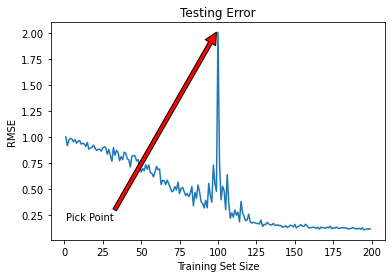

In [53]:
random.seed(2)
predictors_num = 100
# sampling weight + normalized the weights
w = np.random.uniform(size=predictors_num)
w = w / np.linalg.norm(w)
#w=torch.Tensor(w)
std = 0.08
train_size_range = np.arange(1,200)
test_size=10000
epsilon_vec = np.random.normal(scale=std, size=test_size)
X_test = []
for i in range(test_size):
  X_test.append(np.random.normal(size=predictors_num))
X_test=np.array(X_test)
y_test = np.dot(X_test,w) + epsilon_vec 
result = []

for size in train_size_range:
  x_train=[]
  for i in range (size):
      x_train.append(np.random.normal(size=predictors_num))
  x_train=np.array(x_train)
  epsilon_vec = np.random.normal(scale=std, size=size)

  y_train=x_train.dot(w) + epsilon_vec

  w_hat = torch.linalg.lstsq(torch.Tensor(x_train), torch.Tensor(y_train))[0]

  y_test_prediction=X_test.dot(np.array(w_hat))

   
  mse =mean_squared_error(y_test, y_test_prediction)
 
  rmse = np.sqrt(mse)
  result.append(rmse)



ymax=max(result)
xmax=np.argmax(result)

plt.annotate('Pick Point',xytext=(1,0.2),xy=(xmax,ymax),arrowprops={'facecolor':'red'})
plt.plot(train_size_range, result)
plt.title("Testing Error")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.show()



In [81]:
random.seed(3)
predictors_num = 100
# sampling weight + normalized the weights
w = np.random.uniform(size=predictors_num)
w = w / np.linalg.norm(w)
#w=torch.Tensor(w)
std = [0.05,0.3,0.5,1.0]
train_size_range = np.arange(1,200)
test_size=10000
X_test = []
for i in range(test_size):
  X_test.append(np.random.normal(size=predictors_num))
X_test=np.array(X_test)
result = {'0.05':[],'0.3':[],'0.5':[],'1.0':[]}
for x in std:
  epsilon_vec = np.random.normal(scale=x, size=test_size)
  y_test = np.dot(X_test,w) + epsilon_vec 
  for size in train_size_range:
    x_train=[]
    for i in range (size):
        x_train.append(np.random.normal(size=predictors_num))
    
    x_train=np.array(x_train)
    epsilon_vec = np.random.normal(scale=x, size=size)

    y_train=x_train.dot(w) + epsilon_vec

    w_hat = torch.linalg.lstsq(torch.Tensor(x_train), torch.Tensor(y_train))[0]

    y_test_prediction=X_test.dot(np.array(w_hat))

    rmse = np.sqrt(np.mean((y_test_prediction-y_test)**2))
    result[str(x)].append(rmse)

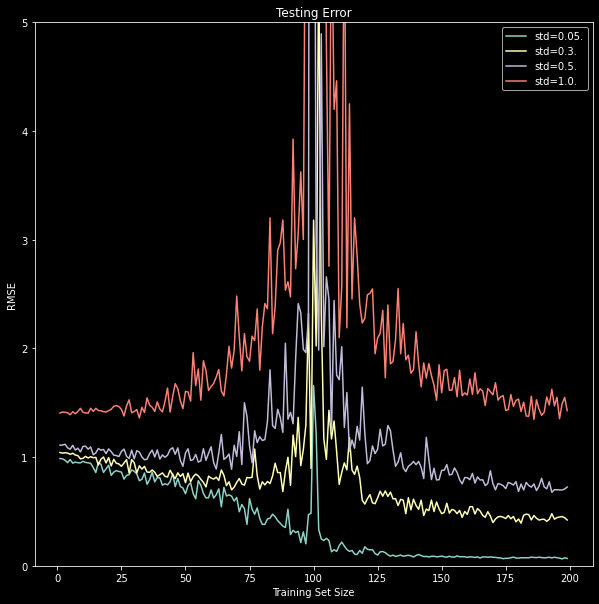

In [83]:
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
plt.plot(train_size_range,result['0.05'], label='std=0.05.')
plt.plot(train_size_range,result['0.3'], label='std=0.3.')
plt.plot(train_size_range,result['0.5'], label='std=0.5.')
plt.plot(train_size_range,result['1.0'], label='std=1.0.')

plt.title("Testing Error")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend()
plt.ylim([0, 5])
plt.show()